<a href="https://colab.research.google.com/github/Dasji-6060/1st_code/blob/main/2nd_Mod_Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [ ]:
#Installing all necessary labraries
!pip install bs4
!pip install requests

In [ ]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np

## **Scrapping Movies Data**

In [ ]:
# Specifying the URL from which movies related data will be fetched
url='https://www.justwatch.com/in/movies?release_year_from=2000'

# Sending an HTTP GET request to the URL
page=requests.get(url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Movie URL's**

In [ ]:
# Write Your Code here
main_website_url = r'https://www.justwatch.com'


movies_link = soup.find_all('a', class_="title-list-grid__item--link")


list_of_movies_links = []

for link in movies_link:

    movie_url = link.get('href')

    list_of_movies_links.append(main_website_url + movie_url)


print(list_of_movies_links)


['https://www.justwatch.com/in/movie/laapataa-ladies', 'https://www.justwatch.com/in/movie/article-370', 'https://www.justwatch.com/in/movie/manjummel-boys', 'https://www.justwatch.com/in/movie/family-star', 'https://www.justwatch.com/in/movie/dune-part-two', 'https://www.justwatch.com/in/movie/black-magic-2024', 'https://www.justwatch.com/in/movie/premalu', 'https://www.justwatch.com/in/movie/aavesham-2024', 'https://www.justwatch.com/in/movie/untitled-shahid-kapoor-kriti-sanon-film', 'https://www.justwatch.com/in/movie/the-crew-2024', 'https://www.justwatch.com/in/movie/yodha-2022', 'https://www.justwatch.com/in/movie/oppenheimer', 'https://www.justwatch.com/in/movie/godzilla-x-kong-the-new-empire', 'https://www.justwatch.com/in/movie/hanu-man', 'https://www.justwatch.com/in/movie/anyone-but-you', 'https://www.justwatch.com/in/movie/monkey-man', 'https://www.justwatch.com/in/movie/madgaon-express', 'https://www.justwatch.com/in/movie/kung-fu-panda-4', 'https://www.justwatch.com/in/mo

## **Scrapping Movie Title**

In [ ]:

list_of_movies_title = []
for link in list_of_movies_links:
    url_from_list = link
    page = requests.get(url_from_list)
    soup = BeautifulSoup(page.text, 'html.parser')
    movie_title = soup.find('h1')
    if movie_title:
        list_of_movies_title.append(movie_title.text.strip())
    else:
        list_of_movies_title.append(f"Title not found for {url}")
print(list_of_movies_title)

['Laapataa Ladies', 'Article 370', 'Manjummel Boys', 'Family Star', 'Dune: Part Two', 'Shaitaan', 'Premalu', 'Aavesham', 'Teri Baaton Mein Aisa Uljha Jiya', 'Crew', 'Yodha', 'Oppenheimer', 'Godzilla x Kong: The New Empire', 'Hanu-Man', 'Anyone But You', 'Monkey Man', 'Madgaon Express', 'Kung Fu Panda 4', 'Amar Singh Chamkila', 'Tillu Square', 'Dune', 'The Beekeeper', 'Animal', '777 Charlie', 'Anatomy of a Fall', 'Godzilla Minus One', '12th Fail', 'The Idea of You', 'Gaami', 'DJ Tillu', 'Hereditary', 'Fighter', 'Kampon', 'Salaar', '365 Days', 'Title not found for https://www.justwatch.com/in/movies?release_year_from=2000', 'Title not found for https://www.justwatch.com/in/movies?release_year_from=2000', 'Title not found for https://www.justwatch.com/in/movies?release_year_from=2000', 'Title not found for https://www.justwatch.com/in/movies?release_year_from=2000', 'Title not found for https://www.justwatch.com/in/movies?release_year_from=2000', 'Title not found for https://www.justwatch

## **Scrapping release Year**

In [ ]:
list_of_release_years = []

# Iterate through each movie link in the list (list_of_movies_links)
for link in list_of_movies_links:
    # Set the current URL
    url_of_movie = link

    try:
        # Sending an HTTP GET request to the URL
        page = requests.get(url_of_movie)
        page.raise_for_status()  # Raise an exception for bad responses (e.g., 404)

        # Parsing the HTML content using BeautifulSoup with the 'html.parser'
        soup = BeautifulSoup(page.text, 'html.parser')

        # Find the release year which is in <span class="text-muted"> on the movie's page
        release_year_tag = soup.find('span', class_="text-muted")

        # Check if the <span> tag is found
        if release_year_tag:
            # Extract the text content of the <span> tag and replace parentheses with an empty string
            release_year = release_year_tag.text.replace('(', '').replace(')', '').strip()
            list_of_release_years.append(release_year)
        else:
            # If <span> tag is not found, add a placeholder to the list
            list_of_release_years.append(f"Release year not found for {url_of_movie}")

    except requests.exceptions.RequestException as req_ex:
        # Handle potential HTTP request errors
        print(f"Error fetching {url_of_movie}: {req_ex}")
        list_of_release_years.append(f"Error fetching {url_of_movie}")

    except Exception as ex:
        # Handle other unexpected exceptions
        print(f"Error processing {url_of_movie}: {ex}")
        list_of_release_years.append(f"Error processing {url_of_movie}")

# Print the list of extracted release years without parentheses
print(list_of_release_years)


Error fetching https://www.justwatch.com/in/movie/oppenheimer: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/movie/oppenheimer
Error fetching https://www.justwatch.com/in/movie/godzilla-x-kong-the-new-empire: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/movie/godzilla-x-kong-the-new-empire
Error fetching https://www.justwatch.com/in/movie/hanu-man: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/movie/hanu-man
Error fetching https://www.justwatch.com/in/movie/anyone-but-you: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/movie/anyone-but-you
Error fetching https://www.justwatch.com/in/movie/monkey-man: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/movie/monkey-man
Error fetching https://www.justwatch.com/in/movie/madgaon-express: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/movie/madgaon-express
Error fetching https://www

## **Scrapping Genres*

In [ ]:
# Write Your Code here
#  Creating an empty list to store genres
list_of_genres = []

# Iterate through each movie link in the list (list_of_movies_links)
for link in list_of_movies_links:
    # Set the current URL
    url_of_movie = link

    try:
        # Sending an HTTP GET request to the URL
        page = requests.get(url_of_movie)
        page.raise_for_status()  # Raise an exception for bad responses (e.g., 404)

        # Parsing the HTML content using BeautifulSoup with the 'html.parser'
        soup = BeautifulSoup(page.text, 'html.parser')

        # Find the <h3> tag containing "Genres"
        genres_heading = soup.find('h3', class_="detail-infos__subheading", string="Genres")

        # Check if the <h3> tag is found
        if genres_heading:
            # Extract the next sibling <div> tag (which contains the genres)
            genres_div = genres_heading.find_next('div', class_="detail-infos__value")
            if genres_div:
                # Extract the text content of the <div> tag and strip extra whitespaces
                genres = genres_div.text.strip()
                list_of_genres.append(genres)
            else:
                list_of_genres.append(f"Genres not found for {url_of_movie}")
        else:
            list_of_genres.append(f"Genres heading not found for {url_of_movie}")

    except requests.exceptions.RequestException as req_ex:
        # Handle potential HTTP request errors
        print(f"Error fetching {url_of_movie}: {req_ex}")
        list_of_genres.append(f"Error fetching {url_of_movie}")

    except Exception as ex:
        # Handle other unexpected exceptions
        print(f"Error processing {url_of_movie}: {ex}")
        list_of_genres.append(f"Error processing {url_of_movie}")

# Print the list of extracted genres
print(list_of_genres)

Error fetching https://www.justwatch.com/in/movie/animal-2022: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/movie/animal-2022
Error fetching https://www.justwatch.com/in/movie/777-charlie: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/movie/777-charlie
Error fetching https://www.justwatch.com/in/movie/anatomie-dune-chute: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/movie/anatomie-dune-chute
Error fetching https://www.justwatch.com/in/movie/godzilla-minus-one: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/movie/godzilla-minus-one
Error fetching https://www.justwatch.com/in/movie/12th-fail: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/movie/12th-fail
Error fetching https://www.justwatch.com/in/movie/the-idea-of-you: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/movie/the-idea-of-you
Error fetching https://www.justwatch

## **Scrapping IMBD Rating**

In [ ]:
# Write Your Code here
#  Creating an empty list to store ratings
list_of_ratings = []

# Iterate through each movie link in the list
for link in list_of_movies_links:
    try:
        # Sending an HTTP GET request to the URL
        page = requests.get(link)
        page.raise_for_status()  # Raise an exception for bad responses (e.g., 404)

        # Parsing the HTML content using BeautifulSoup with the 'html.parser'
        soup = BeautifulSoup(page.text, 'html.parser')

        # Find the img tag with alt attribute 'IMDB'
        imdb_img = soup.find('img', alt=re.compile(r'IMDB'))

        if imdb_img:
            # Extract IMDb rating from the following sibling span
            imdb_rating_span = imdb_img.find_next('span')
            imdb_rating = re.search(r'\d+\.\d+', imdb_rating_span.get_text()).group()
            list_of_ratings.append(imdb_rating)
        else:
            list_of_ratings.append("IMDb Rating not found")

    except requests.exceptions.RequestException as req_ex:
        # Handle potential HTTP request errors
        print(f"Error fetching {link}: {req_ex}")
        list_of_ratings.append(f"Error fetching {link}")

    except Exception as ex:
        # Handle other unexpected exceptions
        print(f"Error processing {link}: {ex}")
        list_of_ratings.append(f"Error processing {link}")

# Print the list of extracted IMDb ratings
print(list_of_ratings)

Error fetching https://www.justwatch.com/in/movie/manjummel-boys: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/movie/manjummel-boys
Error fetching https://www.justwatch.com/in/movie/family-star: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/movie/family-star
Error fetching https://www.justwatch.com/in/movie/dune-part-two: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/movie/dune-part-two
Error fetching https://www.justwatch.com/in/movie/black-magic-2024: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/movie/black-magic-2024
Error fetching https://www.justwatch.com/in/movie/premalu: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/movie/premalu
Error fetching https://www.justwatch.com/in/movie/aavesham-2024: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/movie/aavesham-2024
Error fetching https://www.justwatch.com/in/movie/unti

## **Scrapping Runtime/Duration**

In [ ]:
# Write Your Code here
# Creating an empty list to store runtimes
list_of_runtimes = []

# Iterate through each movie link in the list
for link in list_of_movies_links:
    try:
        # Sending an HTTP GET request to the URL
        page = requests.get(link)
        page.raise_for_status()  # Raise an exception for bad responses (e.g., 404)

        # Parsing the HTML content using BeautifulSoup with the 'html.parser'
        soup = BeautifulSoup(page.text, 'html.parser')

        # Find the <h3> tag containing "Runtime"
        runtime_heading = soup.find('h3', class_='detail-infos__subheading', string='Runtime')

        if runtime_heading:
            # Extract the runtime from the following sibling div
            runtime_div = runtime_heading.find_next('div', class_='detail-infos__value')
            runtime = runtime_div.get_text(strip=True)
            list_of_runtimes.append(runtime)
        else:
            list_of_runtimes.append("Runtime not found")

    except requests.exceptions.RequestException as req_ex:
        # Handle potential HTTP request errors
        print(f"Error fetching {link}: {req_ex}")
        list_of_runtimes.append(f"Error fetching {link}")

    except Exception as ex:
        # Handle other unexpected exceptions
        print(f"Error processing {link}: {ex}")
        list_of_runtimes.append(f"Error processing {link}")

# Print the list of extracted runtimes
print(list_of_runtimes)

Error fetching https://www.justwatch.com/in/movie/aavesham-2024: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/movie/aavesham-2024
Error fetching https://www.justwatch.com/in/movie/untitled-shahid-kapoor-kriti-sanon-film: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/movie/untitled-shahid-kapoor-kriti-sanon-film
Error fetching https://www.justwatch.com/in/movie/the-crew-2024: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/movie/the-crew-2024
Error fetching https://www.justwatch.com/in/movie/yodha-2022: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/movie/yodha-2022
Error fetching https://www.justwatch.com/in/movie/oppenheimer: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/movie/oppenheimer
Error fetching https://www.justwatch.com/in/movie/godzilla-x-kong-the-new-empire: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/movie/g

## **Scrapping Age Rating**

In [ ]:
# Write Your Code here
list_of_age_ratings = []

# Iterate through each movie link in the list
for link in list_of_movies_links:
    try:
        # Sending an HTTP GET request to the URL
        page = requests.get(link)
        page.raise_for_status()  # Raise an exception for bad responses (e.g., 404)

        # Parsing the HTML content using BeautifulSoup with the 'html.parser'
        soup = BeautifulSoup(page.text, 'html.parser')

        # Find the h3 tag with class 'detail-infos__subheading' and text 'Age rating'
        age_rating_heading = soup.find('h3', class_='detail-infos__subheading', string='Age rating')

        if age_rating_heading:
            # Extract age rating from the following sibling div
            age_rating = age_rating_heading.find_next('div', class_='detail-infos__value').get_text(strip=True)
            list_of_age_ratings.append(age_rating)
        else:
            list_of_age_ratings.append("Age rating not found")

    except requests.exceptions.RequestException as req_ex:
        # Handle potential HTTP request errors
        print(f"Error fetching {link}: {req_ex}")
        list_of_age_ratings.append(f"Error fetching {link}")

    except Exception as ex:
        # Handle other unexpected exceptions
        print(f"Error processing {link}: {ex}")
        list_of_age_ratings.append(f"Error processing {link}")

# Print the list of extracted age ratings
print(list_of_age_ratings)


Error fetching https://www.justwatch.com/in/movie/crakk-jeetegaa-toh-jiyegaa: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/movie/crakk-jeetegaa-toh-jiyegaa
Error fetching https://www.justwatch.com/in/movie/sam-bahadur: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/movie/sam-bahadur
Error fetching https://www.justwatch.com/in/movie/poor-things: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/movie/poor-things
Error fetching https://www.justwatch.com/in/movie/harry-potter-and-the-philosophers-stone: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/movie/harry-potter-and-the-philosophers-stone
Error fetching https://www.justwatch.com/in/movie/speak-no-evil-2022: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/movie/speak-no-evil-2022
Error fetching https://www.justwatch.com/in/movie/the-raid: 429 Client Error: Too Many Requests for url: https://www.justwatc

## **Fetching Production Countries Details**

In [ ]:
# Write Your Code here
import re

# Creating an empty list to store production countries
list_of_production_countries = []

# Iterate through each movie link in the list
for link in list_of_movies_links:
    try:
        # Sending an HTTP GET request to the URL
        page = requests.get(link)
        page.raise_for_status()  # Raise an exception for bad responses (e.g., 404)

        # Parsing the HTML content using BeautifulSoup with the 'html.parser'
        soup = BeautifulSoup(page.text, 'html.parser')

        # Find the h3 tag with class 'detail-infos__subheading' and text 'Production country'
        production_country_heading = soup.find('h3', class_='detail-infos__subheading', string=re.compile(r'Production\s*country', re.I))

        if production_country_heading:
            # Extract production country from the following sibling div
            production_country = production_country_heading.find_next('div', class_='detail-infos__value').get_text(strip=True)
            list_of_production_countries.append(production_country)
        else:
            list_of_production_countries.append("Production country not found")

    except requests.exceptions.RequestException as req_ex:
        # Handle potential HTTP request errors
        print(f"Error fetching {link}: {req_ex}")
        list_of_production_countries.append(f"Error fetching {link}")

    except Exception as ex:
        # Handle other unexpected exceptions
        print(f"Error processing {link}: {ex}")
        list_of_production_countries.append(f"Error processing {link}")

# Print the list of extracted production countries
print(list_of_production_countries)


Error fetching https://www.justwatch.com/in/movie/dune-part-two: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/movie/dune-part-two
Error fetching https://www.justwatch.com/in/movie/black-magic-2024: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/movie/black-magic-2024
Error fetching https://www.justwatch.com/in/movie/premalu: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/movie/premalu
Error fetching https://www.justwatch.com/in/movie/aavesham-2024: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/movie/aavesham-2024
Error fetching https://www.justwatch.com/in/movie/untitled-shahid-kapoor-kriti-sanon-film: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/movie/untitled-shahid-kapoor-kriti-sanon-film
Error fetching https://www.justwatch.com/in/movie/the-crew-2024: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/movie/the-crew-2024


## **Fetching Streaming Service Details**

In [ ]:
# Write Your Code here
list_of_streaming_services = []
# Iterate through each movie link in the list
for link in list_of_movies_links:
    try:
        # Sending an HTTP GET request to the URL
        page = requests.get(link)
        page.raise_for_status()  # Raise an exception for bad responses (e.g., 404)

        # Parsing the HTML content using BeautifulSoup with the 'html.parser'
        soup = BeautifulSoup(page.text, 'html.parser')

        # Find the streaming service icon based on the class 'offer__icon'
        streaming_service_icon = soup.find('img', class_='offer__icon')

        if streaming_service_icon:
            # Extract the alt attribute from the streaming service icon
            streaming_service_alt = streaming_service_icon['alt']
            list_of_streaming_services.append(streaming_service_alt)
        else:
            list_of_streaming_services.append("Streaming services not found")

    except requests.exceptions.RequestException as req_ex:
        # Handle potential HTTP request errors
        print(f"Error fetching {link}: {req_ex}")
        list_of_streaming_services.append(f"Error fetching {link}")

    except Exception as ex:
        # Handle other unexpected exceptions
        print(f"Error processing {link}: {ex}")
        list_of_streaming_services.append(f"Error processing {link}")

# Print the list of extracted streaming service information
print(list_of_streaming_services)


Error fetching https://www.justwatch.com/in/movie/manjummel-boys: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/movie/manjummel-boys
Error fetching https://www.justwatch.com/in/movie/family-star: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/movie/family-star
Error fetching https://www.justwatch.com/in/movie/dune-part-two: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/movie/dune-part-two
Error fetching https://www.justwatch.com/in/movie/black-magic-2024: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/movie/black-magic-2024
Error fetching https://www.justwatch.com/in/movie/premalu: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/movie/premalu
Error fetching https://www.justwatch.com/in/movie/aavesham-2024: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/movie/aavesham-2024
Error fetching https://www.justwatch.com/in/movie/the-

## **Now Creating Movies DataFrame**

In [ ]:
# Write Your Code here
dic_for_movies_data_frame = {
    "Movie Name": list_of_movies_title,
    "Release Year": list_of_release_years,
    "Rating": list_of_ratings,
    "Runtime": list_of_runtimes,
    "Streaming Service": list_of_streaming_services,
    "Genre": list_of_genres,
    "Age Rating": list_of_age_ratings,
    "Production Countries": list_of_production_countries,
    "Movie Page Link": list_of_movies_links
}

# Create a DataFrame from the dictionary
movies_dataframe = pd.DataFrame(dic_for_movies_data_frame)

# Display the first few rows of the DataFrame
movies_dataframe.head()

,Movie Name,Release Year,Rating,Runtime,Streaming Service,Genre,Age Rating,Production Countries,Movie Page Link
0,Laapataa Ladies,2024,8.5,2h 2min,Netflix,"Comedy, Drama",UA,India,https://www.justwatch.com/in/movie/laapataa-la...
1,Article 370,2024,8.0,2h 38min,Netflix,"Action & Adventure, Drama, Mystery & Thriller",Age rating not found,India,https://www.justwatch.com/in/movie/article-370
2,Manjummel Boys,2024,Error fetching https://www.justwatch.com/in/mo...,2h 15min,Error fetching https://www.justwatch.com/in/mo...,"Mystery & Thriller, Drama, Action & Adventure",UA,India,https://www.justwatch.com/in/movie/manjummel-boys
3,Family Star,2024,Error fetching https://www.justwatch.com/in/mo...,2h 39min,Error fetching https://www.justwatch.com/in/mo...,"Action & Adventure, Drama, Comedy, Romance",Age rating not found,India,https://www.justwatch.com/in/movie/family-star
4,Dune: Part Two,2024,Error fetching https://www.justwatch.com/in/mo...,2h 47min,Error fetching https://www.justwatch.com/in/mo...,"Science-Fiction, Action & Adventure, Drama",Age rating not found,Error fetching https://www.justwatch.com/in/mo...,https://www.justwatch.com/in/movie/dune-part-two


## **Scraping TV  Show Data**

In [ ]:
# Specifying the URL from which tv show related data will be fetched
tv_url='https://www.justwatch.com/in/tv-shows?release_year_from=2000'
page=requests.get(tv_url)
soup=BeautifulSoup(page.text,'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Tv shows Url details**

In [ ]:
# Write Your Code here
series_links_html = soup.find_all('a', class_="title-list-grid__item--link")
lst_of_series_urls=[]
for links in series_links_html:
  relative_url= links.get('href')
  absolute_url= main_website_url + relative_url
  lst_of_series_urls.append(absolute_url)
print(lst_of_series_urls)



['https://www.justwatch.com/in/tv-show/shogun-2024', 'https://www.justwatch.com/in/tv-show/heeramandi', 'https://www.justwatch.com/in/tv-show/panchayat', 'https://www.justwatch.com/in/tv-show/fallout', 'https://www.justwatch.com/in/tv-show/mirzapur', 'https://www.justwatch.com/in/tv-show/game-of-thrones', 'https://www.justwatch.com/in/tv-show/3-body-problem', 'https://www.justwatch.com/in/tv-show/dead-boy-detectives', 'https://www.justwatch.com/in/tv-show/baby-reindeer', 'https://www.justwatch.com/in/tv-show/apharan', 'https://www.justwatch.com/in/tv-show/young-sheldon', 'https://www.justwatch.com/in/tv-show/attack-on-titan', 'https://www.justwatch.com/in/tv-show/the-walking-dead', 'https://www.justwatch.com/in/tv-show/inspector-rishi', 'https://www.justwatch.com/in/tv-show/sunflower-2021', 'https://www.justwatch.com/in/tv-show/aashram', 'https://www.justwatch.com/in/tv-show/lucifer', 'https://www.justwatch.com/in/tv-show/a-gentleman-in-moscow', 'https://www.justwatch.com/in/tv-show/fa

## **Fetching Tv Show Title details**

In [ ]:
# Write Your Code here
list_of_titles =[]
for links in lst_of_series_urls:
  page= requests.get(links)
  soup_series= BeautifulSoup(page.text,'html.parser')
  series_title_element= soup_series.find('h1')
  if series_title_element:
    series_title_text= series_title_element.text.strip()
    list_of_titles.append(series_title_text)
  else:
    list_of_titles.append(f"title not found for : {links}")
print(list_of_titles)

['Shōgun', 'Heeramandi: The Diamond Bazaar', 'Panchayat', 'Fallout', 'Mirzapur', 'Game of Thrones', '3 Body Problem', 'Dead Boy Detectives', 'Baby Reindeer', 'Apharan', 'Young Sheldon', 'Attack on Titan', 'The Walking Dead', 'Inspector Rishi', 'Sunflower', 'Aashram', 'Lucifer', 'A Gentleman in Moscow', 'Farzi', 'Mastram', 'The Great Indian Kapil Show', 'Solo Leveling', 'title not found for : https://www.justwatch.com/in/tv-show/dil-dosti-dilemma', 'title not found for : https://www.justwatch.com/in/tv-show/ripley', 'title not found for : https://www.justwatch.com/in/tv-show/thank-you-next', 'The Gentlemen', 'title not found for : https://www.justwatch.com/in/tv-show/murder-in-mahim', 'title not found for : https://www.justwatch.com/in/tv-show/queen-of-tears', 'title not found for : https://www.justwatch.com/in/tv-show/ranneeti-balakot-and-beyond', 'title not found for : https://www.justwatch.com/in/tv-show/we-were-the-lucky-ones', 'title not found for : https://www.justwatch.com/in/tv-

## **Fetching Release Year**

In [ ]:
# Write Your Code here
list_of_release_years = []

# Iterate through each series link in the list (list_of_series_links)
for series_link in lst_of_series_urls:
    # Set the current URL
    url_for_series = series_link

    try:
        # Sending an HTTP GET request to the series URL
        page_for_series = requests.get(url_for_series)
        page_for_series.raise_for_status()  # Raise an exception for bad responses (e.g., 404)

        # Parsing the HTML content using BeautifulSoup with the 'html.parser'
        soup_for_series = BeautifulSoup(page_for_series.text, 'html.parser')

        # Find the release year which is in <span class="text-muted"> on the series's page
        release_year_tag = soup_for_series.find('span', class_="text-muted")

        # Check if the <span> tag is found
        if release_year_tag:
            # Extract the text content of the <span> tag and replace parentheses with an empty string
            release_year_text = release_year_tag.text.replace('(', '').replace(')', '').strip()
            list_of_release_years.append(release_year_text)
        else:
            # If <span> tag is not found, add a placeholder to the list
            list_of_release_years.append(f"Release year not found for {url_for_series}")

    except requests.exceptions.RequestException as req_ex:
        # Handle potential HTTP request errors
        print(f"Error fetching {url_for_series}: {req_ex}")
        list_of_release_years.append(f"Error fetching {url_for_series}")

    except Exception as ex:
        # Handle other unexpected exceptions
        print(f"Error processing {url_for_series}: {ex}")
        list_of_release_years.append(f"Error processing {url_for_series}")

# Print the list of extracted release years without parentheses
print(list_of_release_years)


Error fetching https://www.justwatch.com/in/tv-show/panchayat: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/tv-show/panchayat
Error fetching https://www.justwatch.com/in/tv-show/fallout: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/tv-show/fallout
Error fetching https://www.justwatch.com/in/tv-show/mirzapur: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/tv-show/mirzapur
Error fetching https://www.justwatch.com/in/tv-show/3-body-problem: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/tv-show/3-body-problem
Error fetching https://www.justwatch.com/in/tv-show/dead-boy-detectives: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/tv-show/dead-boy-detectives
Error fetching https://www.justwatch.com/in/tv-show/baby-reindeer: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/tv-show/baby-reindeer
Error fetching https://www.justwatch.c

## **Fetching TV Show Genre Details**

In [ ]:
# Write Your Code here
list_of_genres_series = []

# Iterate through each series link in the list (list_of_series_links)
for series_link in lst_of_series_urls:
    # Set the current URL
    url_for_series = series_link

    try:
        # Sending an HTTP GET request to the series URL
        page_for_series = requests.get(url_for_series)
        page_for_series.raise_for_status()  # Raise an exception for bad responses (e.g., 404)

        # Parsing the HTML content using BeautifulSoup with the 'html.parser'
        soup_for_series = BeautifulSoup(page_for_series.text, 'html.parser')

        # Find the <h3> tag containing "Genres"
        genres_heading = soup_for_series.find('h3', class_="detail-infos__subheading", string="Genres")

        # Check if the <h3> tag is found
        if genres_heading:
            # Extract the next sibling <div> tag (which contains the genres)
            genres_div = genres_heading.find_next('div', class_="detail-infos__value")
            if genres_div:
                # Extract the text content of the <div> tag and strip extra whitespaces
                genres_text = genres_div.text.strip()
                list_of_genres_series.append(genres_text)
            else:
                list_of_genres_series.append(f"Genres not found for {url_for_series}")
        else:
            list_of_genres_series.append(f"Genres heading not found for {url_for_series}")

    except requests.exceptions.RequestException as req_ex:
        # Handle potential HTTP request errors
        print(f"Error fetching {url_for_series}: {req_ex}")
        list_of_genres_series.append(f"Error fetching {url_for_series}")

    except Exception as ex:
        # Handle other unexpected exceptions
        print(f"Error processing {url_for_series}: {ex}")
        list_of_genres_series.append(f"Error processing {url_for_series}")

# Print the list of extracted genres
print(list_of_genres_series)

Error fetching https://www.justwatch.com/in/tv-show/dead-boy-detectives: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/tv-show/dead-boy-detectives
Error fetching https://www.justwatch.com/in/tv-show/baby-reindeer: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/tv-show/baby-reindeer
Error fetching https://www.justwatch.com/in/tv-show/apharan: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/tv-show/apharan
Error fetching https://www.justwatch.com/in/tv-show/young-sheldon: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/tv-show/young-sheldon
Error fetching https://www.justwatch.com/in/tv-show/attack-on-titan: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/tv-show/attack-on-titan
Error fetching https://www.justwatch.com/in/tv-show/the-walking-dead: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/tv-show/the-walking-dead
Error fetchi

## **Fetching IMDB Rating Details**

In [ ]:
# Write Your Code here
list_of_imdb_ratings = []

# Iterate through each series link in the list (list_of_series_links)
for series_link in lst_of_series_urls:
    try:
        # Sending an HTTP GET request to the series URL
        page_for_series = requests.get(series_link)
        page_for_series.raise_for_status()  # Raise an exception for bad responses (e.g., 404)

        # Parsing the HTML content using BeautifulSoup with the 'html.parser'
        soup_for_series = BeautifulSoup(page_for_series.text, 'html.parser')

        # Find the img tag with alt attribute 'IMDB'
        imdb_img = soup_for_series.find('img', alt=re.compile(r'IMDB'))

        if imdb_img:
            # Extract IMDb rating from the following sibling span
            imdb_rating_span = imdb_img.find_next('span')
            imdb_rating = re.search(r'\d+\.\d+', imdb_rating_span.get_text()).group()
            list_of_imdb_ratings.append(imdb_rating)
        else:
            list_of_imdb_ratings.append("IMDb Rating not found")

    except requests.exceptions.RequestException as req_ex:
        # Handle potential HTTP request errors
        print(f"Error fetching {series_link}: {req_ex}")
        list_of_imdb_ratings.append(f"Error fetching {series_link}")

    except Exception as ex:
        # Handle other unexpected exceptions
        print(f"Error processing {series_link}: {ex}")
        list_of_imdb_ratings.append(f"Error processing {series_link}")

# Print the list of extracted IMDb ratings
print(list_of_imdb_ratings)


Error fetching https://www.justwatch.com/in/tv-show/attack-on-titan: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/tv-show/attack-on-titan
Error fetching https://www.justwatch.com/in/tv-show/the-walking-dead: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/tv-show/the-walking-dead
Error fetching https://www.justwatch.com/in/tv-show/inspector-rishi: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/tv-show/inspector-rishi
Error fetching https://www.justwatch.com/in/tv-show/sunflower-2021: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/tv-show/sunflower-2021
Error fetching https://www.justwatch.com/in/tv-show/aashram: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/tv-show/aashram
Error fetching https://www.justwatch.com/in/tv-show/lucifer: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/tv-show/lucifer
Error fetching https://www.jus

## **Fetching Age Rating Details**

In [ ]:
# Write Your Code here
list_of_age_ratings = []

# Iterate through each series link in the list (list_of_series_links)
for series_link in lst_of_series_urls:
    try:
        # Sending an HTTP GET request to the series URL
        page_for_series = requests.get(series_link)
        page_for_series.raise_for_status()  # Raise an exception for bad responses (e.g., 404)

        # Parsing the HTML content using BeautifulSoup with the 'html.parser'
        soup_for_series = BeautifulSoup(page_for_series.text, 'html.parser')

        # Find the h3 tag with class 'detail-infos__subheading' and text 'Age rating'
        age_rating_heading = soup_for_series.find('h3', class_='detail-infos__subheading', string='Age rating')

        if age_rating_heading:
            # Extract age rating from the following sibling div
            age_rating = age_rating_heading.find_next('div', class_='detail-infos__value').get_text(strip=True)
            list_of_age_ratings.append(age_rating)
        else:
            list_of_age_ratings.append("Age rating not found")

    except requests.exceptions.RequestException as req_ex:
        # Handle potential HTTP request errors
        print(f"Error fetching {series_link}: {req_ex}")
        list_of_age_ratings.append(f"Error fetching {series_link}")

    except Exception as ex:
        # Handle other unexpected exceptions
        print(f"Error processing {series_link}: {ex}")
        list_of_age_ratings.append(f"Error processing {series_link}")

# Print the list of extracted age ratings
print(list_of_age_ratings)

Error fetching https://www.justwatch.com/in/tv-show/mirzapur: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/tv-show/mirzapur
Error fetching https://www.justwatch.com/in/tv-show/game-of-thrones: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/tv-show/game-of-thrones
Error fetching https://www.justwatch.com/in/tv-show/3-body-problem: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/tv-show/3-body-problem
Error fetching https://www.justwatch.com/in/tv-show/dead-boy-detectives: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/tv-show/dead-boy-detectives
Error fetching https://www.justwatch.com/in/tv-show/baby-reindeer: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/tv-show/baby-reindeer
Error fetching https://www.justwatch.com/in/tv-show/apharan: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/tv-show/apharan
Error fetching https://www

## **Fetching Production Country details**

In [ ]:
# Write Your Code here
import re
import requests
from bs4 import BeautifulSoup

# Creating an empty list to store production countries
list_of_production_countries = []

for series_link in lst_of_series_urls:
    try:
        # Sending an HTTP GET request to the series URL
        page_for_series = requests.get(series_link, timeout=10)  # Adjust timeout as needed
        page_for_series.raise_for_status()

        # Parsing the HTML content using BeautifulSoup with the 'html.parser'
        soup_for_series = BeautifulSoup(page_for_series.text, 'html.parser')

        # Find the production country directly
        production_country = soup_for_series.find('h3', class_='detail-infos__subheading', string=re.compile(r'production\s*country', re.I))

        if production_country:
            production_country = production_country.find_next('div', class_='detail-infos__value').get_text(strip=True)
            list_of_production_countries.append(production_country)
        else:
            list_of_production_countries.append("Production country not found")

    except requests.exceptions.RequestException as req_ex:
        # Handle potential HTTP request errors
        print(f"Error fetching {series_link}: {req_ex}")
        list_of_production_countries.append(f"Error fetching {series_link}")

    except Exception as ex:
        # Handle other unexpected exceptions
        print(f"Error processing {series_link}: {ex}")
        list_of_production_countries.append(f"Error processing {series_link}")

# Print the list of extracted production countries
print(list_of_production_countries)

Error fetching https://www.justwatch.com/in/tv-show/gandii-baat: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/tv-show/gandii-baat
Error fetching https://www.justwatch.com/in/tv-show/the-rookie: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/tv-show/the-rookie
Error fetching https://www.justwatch.com/in/tv-show/dark-matter-2024: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/tv-show/dark-matter-2024
Error fetching https://www.justwatch.com/in/tv-show/asur: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/tv-show/asur
Error fetching https://www.justwatch.com/in/tv-show/jujutsu-kaisen: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/tv-show/jujutsu-kaisen
Error fetching https://www.justwatch.com/in/tv-show/house-of-the-dragon: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/tv-show/house-of-the-dragon
Error fetching https://www.jus

## **Fetching Streaming Service details**

In [ ]:
# Write Your Code here
list_of_streaming_services = []

# Iterate through each series link in the list (list_of_series_links)
for series_link in lst_of_series_urls:
    try:
        # Sending an HTTP GET request to the series URL
        page_for_series = requests.get(series_link)
        page_for_series.raise_for_status()  # Raise an exception for bad responses (e.g., 404)

        # Parsing the HTML content using BeautifulSoup with the 'html.parser'
        soup_for_series = BeautifulSoup(page_for_series.text, 'html.parser')

        # Find the streaming service icon based on the class 'offer__icon'
        streaming_service_icon = soup_for_series.find('img', class_='offer__icon')

        if streaming_service_icon:
            # Extract the alt attribute from the streaming service icon
            streaming_service_alt = streaming_service_icon['alt']
            list_of_streaming_services.append(streaming_service_alt)
        else:
            list_of_streaming_services.append("Streaming services not found")

    except requests.exceptions.RequestException as req_ex:
        # Handle potential HTTP request errors
        print(f"Error fetching {series_link}: {req_ex}")
        list_of_streaming_services.append(f"Error fetching {series_link}")

    except Exception as ex:
        # Handle other unexpected exceptions
        print(f"Error processing {series_link}: {ex}")
        list_of_streaming_services.append(f"Error processing {series_link}")

# Print the list of extracted streaming service information
print(list_of_streaming_services)

Error fetching https://www.justwatch.com/in/tv-show/asur: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/tv-show/asur
Error fetching https://www.justwatch.com/in/tv-show/jujutsu-kaisen: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/tv-show/jujutsu-kaisen
Error fetching https://www.justwatch.com/in/tv-show/house-of-the-dragon: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/tv-show/house-of-the-dragon
Error fetching https://www.justwatch.com/in/tv-show/true-detective: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/tv-show/true-detective
Error fetching https://www.justwatch.com/in/tv-show/goodbye-earth: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/tv-show/goodbye-earth
Error fetching https://www.justwatch.com/in/tv-show/maamla-legal-hai: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/tv-show/maamla-legal-hai
Error fetching htt

## **Fetching Duration Details**

In [ ]:
# Write Your Code here
list_of_runtimes = []

# Iterate through each series link in the list (list_of_series_links)
for series_link in lst_of_series_urls:
    try:
        # Sending an HTTP GET request to the series URL
        page_for_series = requests.get(series_link)
        page_for_series.raise_for_status()  # Raise an exception for bad responses (e.g., 404)

        # Parsing the HTML content using BeautifulSoup with the 'html.parser'
        soup_for_series = BeautifulSoup(page_for_series.text, 'html.parser')

        # Find the <h3> tag containing "Runtime"
        runtime_heading = soup_for_series.find('h3', class_='detail-infos__subheading', string='Runtime')

        if runtime_heading:
            # Extract the runtime from the following sibling div
            runtime_div = runtime_heading.find_next('div', class_='detail-infos__value')
            runtime = runtime_div.get_text(strip=True)
            list_of_runtimes.append(runtime)
        else:
            list_of_runtimes.append("Runtime not found")

    except requests.exceptions.RequestException as req_ex:
        # Handle potential HTTP request errors
        print(f"Error fetching {series_link}: {req_ex}")
        list_of_runtimes.append(f"Error fetching {series_link}")

    except Exception as ex:
        # Handle other unexpected exceptions
        print(f"Error processing {series_link}: {ex}")
        list_of_runtimes.append(f"Error processing {series_link}")

# Print the list of extracted runtimes
print(list_of_runtimes)


Error fetching https://www.justwatch.com/in/tv-show/farzi: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/tv-show/farzi
Error fetching https://www.justwatch.com/in/tv-show/mastram: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/tv-show/mastram
Error fetching https://www.justwatch.com/in/tv-show/untitled-kapil-sharma-netflix-project: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/tv-show/untitled-kapil-sharma-netflix-project
Error fetching https://www.justwatch.com/in/tv-show/solo-leveling-2024: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/tv-show/solo-leveling-2024
Error fetching https://www.justwatch.com/in/tv-show/ripley: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/tv-show/ripley
Error fetching https://www.justwatch.com/in/tv-show/thank-you-next: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/tv-show/thank-you-next
Erro

## **Creating TV Show DataFrame**

In [ ]:
# Write Your Code here
import pandas as pd

# Create a dictionary to store series data
dict_for_series_data_frame = {
    "Series Name": list_of_titles,
    "Release Year": list_of_release_years,
    "Rating": list_of_imdb_ratings,
    "Runtime": list_of_runtimes,
    "Streaming Service": list_of_streaming_services,
    "Genre": list_of_genres_series,
    "Age Rating": list_of_age_ratings,
    "Production Countries": list_of_production_countries,
    "Series Page Link": lst_of_series_urls
}

# Create a DataFrame from the dictionary
series_dataframe = pd.DataFrame(dict_for_series_data_frame)

# Display the first few rows of the DataFrame
series_dataframe.head()

,Series Name,Release Year,Rating,Runtime,Streaming Service,Genre,Age Rating,Production Countries,Series Page Link
0,Shōgun,2024,8.8,59min,Hotstar,"Drama, War & Military, History",Age rating not found,United States,https://www.justwatch.com/in/tv-show/shogun-2024
1,Heeramandi: The Diamond Bazaar,2024,6.6,55min,Netflix,"History, Romance, Drama",Age rating not found,India,https://www.justwatch.com/in/tv-show/heeramandi
2,Panchayat,Error fetching https://www.justwatch.com/in/tv...,8.9,33min,Amazon Prime Video,"Comedy, Drama",Age rating not found,India,https://www.justwatch.com/in/tv-show/panchayat
3,Fallout,Error fetching https://www.justwatch.com/in/tv...,8.5,59min,Amazon Prime Video,"Drama, Science-Fiction, War & Military, Action...",A,United States,https://www.justwatch.com/in/tv-show/fallout
4,Mirzapur,Error fetching https://www.justwatch.com/in/tv...,8.5,50min,Amazon Prime Video,"Crime, Action & Adventure, Drama, Mystery & Th...",Error fetching https://www.justwatch.com/in/tv...,India,https://www.justwatch.com/in/tv-show/mirzapur


## **Task 2 :- Data Filtering & Analysis**

In [ ]:
# Write Your Code here
from datetime import datetime

# Convert 'Release Year' and 'Rating' columns to numeric
movies_dataframe['Release Year'] = pd.to_numeric(movies_dataframe['Release Year'], errors='coerce')
movies_dataframe['Rating'] = pd.to_numeric(movies_dataframe['Rating'], errors='coerce')

series_dataframe['Release Year'] = pd.to_numeric(series_dataframe['Release Year'], errors='coerce')
series_dataframe['Rating'] = pd.to_numeric(series_dataframe['Rating'], errors='coerce')

# Get the current year
current_year = datetime.now().year

# Filter movies and TV shows released in the last 2 years
recent_movies = movies_dataframe[movies_dataframe['Release Year'] >= current_year - 2]
recent_series = series_dataframe[series_dataframe['Release Year'] >= current_year - 2]

# Filter movies and TV shows with an IMDb rating of 7 or higher
high_rated_movies = movies_dataframe[movies_dataframe['Rating'] >= 7.0]
high_rated_series = series_dataframe[series_dataframe['Rating'] >= 7.0]

# Save filtered movies and TV shows in new dataframe variables
filtered_movies = recent_movies[recent_movies['Rating'] >= 7.0]
filtered_series = recent_series[recent_series['Rating'] >= 7.0]

# Display the filtered dataframes
filtered_movies.head()

filtered_series.head()

,Series Name,Release Year,Rating,Runtime,Streaming Service,Genre,Age Rating,Production Countries,Series Page Link
0,Shōgun,2024.0,8.8,59min,Hotstar,"Drama, War & Military, History",Age rating not found,United States,https://www.justwatch.com/in/tv-show/shogun-2024


## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [ ]:
# Write Your Code here
mean_imdb_rating_movies = movies_dataframe['Rating'].mean()

# Calculate the mean IMDb rating for TV shows
mean_imdb_rating_series = series_dataframe['Rating'].mean()

print(f"Mean IMDb Rating for Movies: {mean_imdb_rating_movies}")
print(f"Mean IMDb Rating for TV Shows: {mean_imdb_rating_series}")


Mean IMDb Rating for Movies: 8.057142857142859
Mean IMDb Rating for TV Shows: 8.04


## **Analyzing Top Genres**

In [ ]:
# Write Your Code here
series_dataframe['Genre'] = series_dataframe['Genre'].str.split(', ')
genres_list_series = [genre for genres in series_dataframe['Genre'].dropna() for genre in genres]
genre_counts_series = pd.Series(genres_list_series).value_counts()

# Split the genres string into a list for movies
movies_dataframe['Genre'] = movies_dataframe['Genre'].str.split(', ')
genres_list_movies = [genre for genres in movies_dataframe['Genre'].dropna() for genre in genres]
genre_counts_movies = pd.Series(genres_list_movies).value_counts()

# Identify the top 5 genres for TV series and movies
top_genres_series = genre_counts_series.head(5)
top_genres_movies = genre_counts_movies.head(5)

print("Top 5 Genres in TV Series:")
print(top_genres_series)

print("\nTop 5 Genres in Movies:")
print(top_genres_movies)


Top 5 Genres in TV Series:
Drama                 12
Mystery & Thriller     6
Action & Adventure     4
Science-Fiction        3
War & Military         2
Name: count, dtype: int64

Top 5 Genres in Movies:
Drama                 17
Action & Adventure    14
Comedy                13
Mystery & Thriller     9
Romance                7
Name: count, dtype: int64


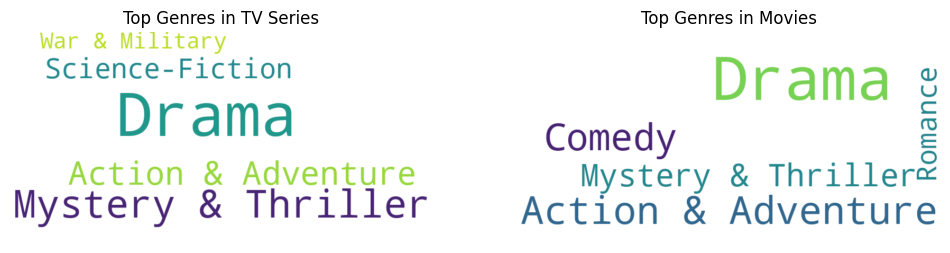

In [ ]:
#Let's Visvalize it using word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud for TV series genres
wordcloud_series = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_genres_series)

# Generate a word cloud for movies genres
wordcloud_movies = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_genres_movies)

# Plot the word clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_series, interpolation='bilinear')
plt.title('Top Genres in TV Series')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_movies, interpolation='bilinear')
plt.title('Top Genres in Movies')
plt.axis('off')

plt.show()

## **Finding Predominant Streaming Service**

In [ ]:
# Write Your Code here
top_streaming_services_movies = movies_dataframe['Streaming Service'].value_counts().reset_index()
top_streaming_services_movies.columns = ['Streaming Service', 'Number of Movies']

# Count the occurrences of each streaming service for TV series
top_streaming_services_series = series_dataframe['Streaming Service'].value_counts().reset_index()
top_streaming_services_series.columns = ['Streaming Service', 'Number of TV Series']

# Display the top streaming services for movies
top_streaming_services_movies.head()

# # Display the top streaming services for TV series
top_streaming_services_series.head()


,Streaming Service,Number of TV Series
0,Amazon Prime Video,12
1,Netflix,10
2,Jio Cinema,5
3,Hotstar,2
4,Streaming services not found,2


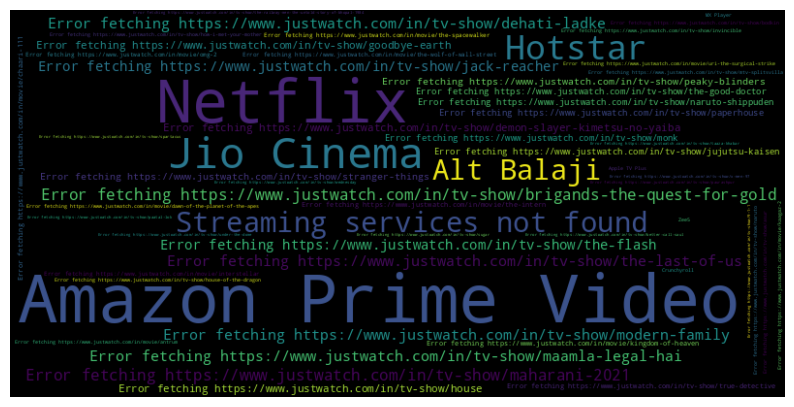

In [ ]:
#Let's Visvalize it using word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine the streaming services from movies and TV series dataframes
all_streaming_services = pd.concat([movies_dataframe['Streaming Service'], series_dataframe['Streaming Service']])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(all_streaming_services.value_counts())

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## **Task 3 :- Data Export**

In [ ]:
#saving final dataframe as Final Data in csv format
movies_dataframe.to_csv('Final_Data_of_Movies.csv', index=False)
series_dataframe.to_csv('Final_Data_of_Series.csv', index=False)

# Display success messages
print("Final Data of Movies saved successfully as 'Final_Data_of_Movies.csv'")
print("Final Data of Series saved successfully as 'Final_Data_of_Series.csv'")

Final Data of Movies saved successfully as 'Final_Data_of_Movies.csv'
Final Data of Series saved successfully as 'Final_Data_of_Series.csv'


In [ ]:
#saving filter data as Filter Data in csv format
filtered_movies.to_csv('Filter_Data_of_Movies.csv', index=False)
filtered_series.to_csv('Filter_Data_of_Series.csv', index=False)

# Display success messages
print("Filter Data of Movies saved successfully as 'Filter_Data_of_Movies.csv'")
print("Filter Data of Series saved successfully as 'Filter_Data_of_Series.csv'")


Filter Data of Movies saved successfully as 'Filter_Data_of_Movies.csv'
Filter Data of Series saved successfully as 'Filter_Data_of_Series.csv'


# **Dataset Drive Link (View Access with Anyone) -**

# ***Congratulations!!! You have completed your Assignment.***